In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
DB_NAME = 'streaming_data.db'
CSV_FILE = 'netflix_titles.csv'

def create_database():
    """Load Netflix data and create derived tables"""
    
    print("Creating database...")
    conn = sqlite3.connect(DB_NAME)
    
    # Load CSV
    if Path(CSV_FILE).exists():
        df = pd.read_csv(CSV_FILE)
        df.to_sql('netflix_titles', conn, if_exists='replace', index=False)
        print(f"✓ Loaded {len(df):,} titles from {CSV_FILE}")
    else:
        print(f"❌ Error: {CSV_FILE} not found!")
        return
    

In [8]:
def run(sql):
    return pd.read_sql(sql, conn)

In [9]:
cursor = conn.cursor()
cursor.execute("CREATE INDEX IF NOT EXISTS idx_type ON netflix_titles(type)")
cursor.execute("CREATE INDEX IF NOT EXISTS idx_year ON netflix_titles(release_year)")

In [10]:
run("""
SELECT * FROM netflix_titles LIMIT 10;
""")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",None,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",None,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [11]:
#Count total rows
run("""
SELECT COUNT(*) AS total_titles FROM netflix_titles;
""")


,total_titles
0,8807


In [12]:
#Counting movies vs Tv Shows
run("""
SELECT type, COUNT(*) AS count
FROM netflix_titles
GROUP BY type;
""")


,type,count
0,Movie,6131
1,TV Show,2676


In [13]:
#Titles added per year
run("""
SELECT release_year, COUNT(*) AS total
FROM netflix_titles
GROUP BY release_year
ORDER BY release_year;
""")


,release_year,total
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
5,1946,2
6,1947,1
7,1954,2
8,1955,3
9,1956,2


In [14]:
#Most active production year
run("""
SELECT release_year, COUNT(*) AS total
FROM netflix_titles
GROUP BY release_year
ORDER BY total DESC
LIMIT 10;
""")


,release_year,total
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
5,2021,592
6,2015,560
7,2014,352
8,2013,288
9,2012,237


In [15]:
#top genres / categories
run("""
SELECT genre, COUNT(*) AS count
FROM (
    SELECT TRIM(value) AS genre
    FROM netflix_titles,
         json_each('["' || REPLACE(listed_in, ',', '","') || '"]')
)
GROUP BY genre
ORDER BY count DESC;
""")


,genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


In [ ]:
# Number od genres per show.  [Not important]
run("""
SELECT 
    title,
    LENGTH(listed_in) - LENGTH(REPLACE(listed_in, ',', '')) + 1 
        AS num_genres
FROM netflix_titles
ORDER BY num_genres DESC
LIMIT 20;
""")

,title,num_genres
0,Blood & Water,3
1,Ganglands,3
2,Kota Factory,3
3,Midnight Mass,3
4,Sankofa,3
5,"Vendetta: Truth, Lies and The Mafia",3
6,Bangkok Breaking,3
7,Crime Stories: India Detectives,3
8,Falsa identidad,3
9,Jaguar,3


In [17]:
#top producing countries
run("""
SELECT country, COUNT(*) AS total
FROM netflix_titles
GROUP BY country
ORDER BY total DESC
LIMIT 20;
""")

,country,total
0,United States,2818
1,India,972
2,None,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


In [ ]:
#Countries split into individual entry
run("""
SELECT country, COUNT(*) AS count
FROM (
    SELECT TRIM(value) AS country
    FROM netflix_titles,
         json_each('["' || REPLACE(country, ',', '","') || '"]')
)
WHERE country != ''
GROUP BY country
ORDER BY count DESC;
""")


,country,count
0,United States,3690
1,India,1046
2,United Kingdom,806
3,Canada,445
4,France,393
...,...,...
117,Azerbaijan,1
118,Armenia,1
119,Angola,1
120,Albania,1


In [19]:
#Most common directors
run("""
SELECT director, COUNT(*) AS count
FROM netflix_titles
WHERE director IS NOT NULL AND director != ''
GROUP BY director
ORDER BY count DESC
LIMIT 20;
""")

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Jay Chapman,12
9,Steven Spielberg,11


In [31]:
#Movie duration distribution
run("""
SELECT duration, COUNT(*) AS count
FROM netflix_titles
WHERE type = 'Movie'
GROUP BY duration
ORDER BY count DESC;
""")

,duration,count
0,90 min,152
1,97 min,146
2,94 min,146
3,93 min,146
4,91 min,144
...,...,...
201,18 min,1
202,178 min,1
203,167 min,1
204,16 min,1


In [32]:
#TV show duration distribution
run("""
SELECT duration, COUNT(*) AS count
FROM netflix_titles
WHERE type = 'TV Show'
GROUP BY duration
ORDER BY count DESC;
""")

,duration,count
0,1 Season,1793
1,2 Seasons,425
2,3 Seasons,199
3,4 Seasons,95
4,5 Seasons,65
5,6 Seasons,33
6,7 Seasons,23
7,8 Seasons,17
8,9 Seasons,9
9,10 Seasons,7


In [34]:
df = pd.read_csv("netflix_titles.csv")
df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), errors="coerce")

In [35]:
df[df["date_added"].isna()][["date_added"]]

,date_added
6066,NaT
6174,NaT
6795,NaT
6806,NaT
6901,NaT
7196,NaT
7254,NaT
7406,NaT
7847,NaT
8182,NaT


In [36]:
conn = sqlite3.connect("streaming_data.db")

df.to_sql("netflix_titles", conn, if_exists="replace", index=False)
conn.commit()

In [37]:
#Peak months for Netflix additions
run("""
SELECT 
    STRFTIME('%m', date(date_added)) AS month_added,
    COUNT(*) AS total
FROM netflix_titles
WHERE date_added IS NOT NULL
GROUP BY month_added
ORDER BY month_added;
""")

,month_added,total
0,01,738
1,02,563
2,03,742
3,04,764
4,05,632
5,06,728
6,07,827
7,08,755
8,09,770
9,10,760


In [38]:
#Search titles about 'crime'
run("""
SELECT title, type, description
FROM netflix_titles
WHERE LOWER(description) LIKE '%crime%';
""")

,title,type,description
0,"Vendetta: Truth, Lies and The Mafia",TV Show,"Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
1,Crime Stories: India Detectives,TV Show,Cameras following Bengaluru police on the job ...
2,Omo Ghetto: the Saga,Movie,Twins are reunited as a good-hearted female ga...
3,In the Cut,Movie,After embarking on an affair with the cop prob...
4,Chappie,Movie,In a futuristic society where an indestructibl...
...,...,...,...
217,The Sniffer,TV Show,An extraordinary sense of smell gives a crime ...
218,Tobot,TV Show,They’re robots that can transform into cars – ...
219,Women Behind Bars,TV Show,This reality series recounts true stories of w...
220,XXx,Movie,A notorious underground rush-seeker deemed unt...


In [39]:
#Searching for titles involving 'love' 
run("""
SELECT title, type
FROM netflix_titles
WHERE LOWER(title) LIKE '%love%';
""")

,title,type
0,Love on the Spectrum,TV Show
1,Love Don't Cost a Thing,Movie
2,Love in a Puff,Movie
3,"LSD: Love, Sex Aur Dhokha",Movie
4,Really Love,Movie
...,...,...
191,The Year of Happiness and Love,TV Show
192,This Is My Love,TV Show
193,Two Lovers and a Bear,Movie
194,What Is Love?,TV Show


In [40]:
#Multi-genre content ranking
run("""
SELECT 
    title,
    LENGTH(listed_in) - LENGTH(REPLACE(listed_in, ',', '')) + 1 AS num_genres
FROM netflix_titles
ORDER BY num_genres DESC
LIMIT 15;
""")

,title,num_genres
0,Blood & Water,3
1,Ganglands,3
2,Kota Factory,3
3,Midnight Mass,3
4,Sankofa,3
5,"Vendetta: Truth, Lies and The Mafia",3
6,Bangkok Breaking,3
7,Crime Stories: India Detectives,3
8,Falsa identidad,3
9,Jaguar,3


In [41]:
#Most prolific directors by genre 
run("""
WITH exploded AS (
    SELECT 
        director,
        TRIM(value) AS genre
    FROM netflix_titles,
         json_each('["' || REPLACE(listed_in, ',', '","') || '"]')
)
SELECT director, genre, COUNT(*) AS count
FROM exploded
WHERE director IS NOT NULL AND director != ''
GROUP BY director, genre
ORDER BY count DESC
LIMIT 20;
""")


,director,genre,count
0,Rajiv Chilaka,Children & Family Movies,19
1,"Raúl Campos, Jan Suter",Stand-Up Comedy,18
2,Suhas Kadav,Children & Family Movies,16
3,Marcus Raboy,Stand-Up Comedy,15
4,Cathy Garcia-Molina,International Movies,13
5,Jay Karas,Stand-Up Comedy,13
6,Jay Chapman,Stand-Up Comedy,12
7,Youssef Chahine,Dramas,12
8,Youssef Chahine,International Movies,10
9,Cathy Garcia-Molina,Dramas,9


In [ ]:
#Country × Genre heatmap
run("""
WITH c AS (
    SELECT show_id,
           TRIM(value) AS country
    FROM netflix_titles,
         json_each('["' || REPLACE(country, ',', '","') || '"]')
),
g AS (
    SELECT show_id,
           TRIM(value) AS genre
    FROM netflix_titles,
         json_each('["' || REPLACE(listed_in, ',', '","') || '"]')
)
SELECT country, genre, COUNT(*) AS count
FROM c
JOIN g USING (show_id)
GROUP BY country, genre
ORDER BY count DESC;
""")


,country,genre,count
0,India,International Movies,864
1,United States,Dramas,835
2,United States,Comedies,680
3,India,Dramas,662
4,United States,Documentaries,512
...,...,...,...
1410,West Germany,TV Comedies,1
1411,West Germany,TV Dramas,1
1412,West Germany,Thrillers,1
1413,Zimbabwe,Comedies,1


In [45]:
#How has Netflix content grown over time?
df_year = run("""
SELECT release_year, COUNT(*) AS total
FROM netflix_titles
GROUP BY release_year
HAVING release_year > 1950
ORDER BY release_year;
""")
df_year


,release_year,total
0,1954,2
1,1955,3
2,1956,2
3,1958,3
4,1959,1
5,1960,4
6,1961,1
7,1962,3
8,1963,2
9,1964,2


In [47]:
#Which genres does Netflix offer the most?
df_genres = run("""
SELECT genre, COUNT(*) AS count
FROM (
    SELECT TRIM(value) AS genre
    FROM netflix_titles,
         json_each('["' || REPLACE(listed_in, ',', '","') || '"]')
)
GROUP BY genre
ORDER BY count DESC;
""")
df_genres.head()

,genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869


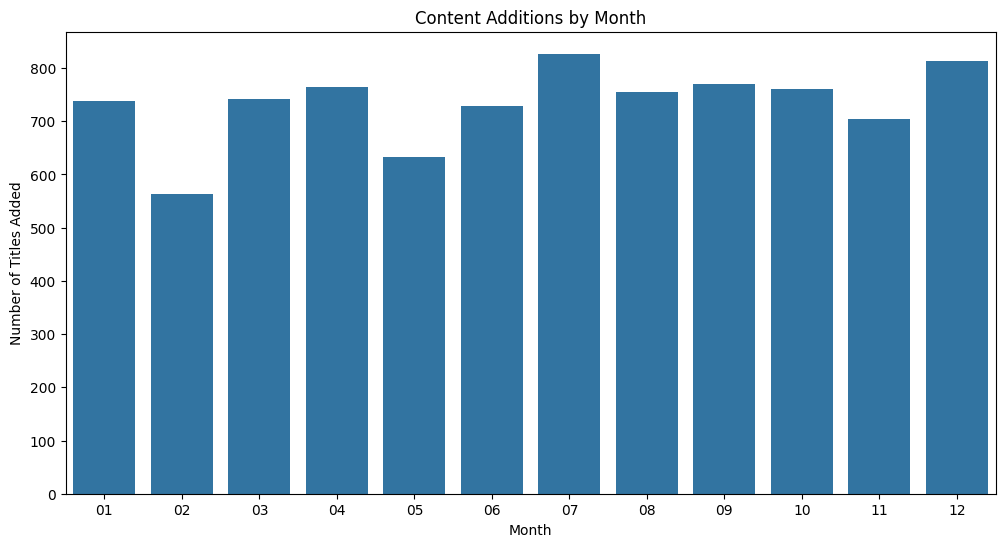

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_month, x='month_added', y='total')
plt.title("Content Additions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.show()

In [64]:
#Top keywords from descriptions
run("""
SELECT 'crime' AS keyword, COUNT(*) AS count
FROM netflix_titles
WHERE LOWER(description) LIKE '%crime%'
UNION
SELECT 'love', COUNT(*)
FROM netflix_titles
WHERE LOWER(description) LIKE '%love%'
UNION
SELECT 'family', COUNT(*)
FROM netflix_titles
WHERE LOWER(description) LIKE '%family%'
UNION
SELECT 'war', COUNT(*)
FROM netflix_titles
WHERE LOWER(description) LIKE '%war%';
""")

,keyword,count
0,crime,222
1,family,630
2,love,704
3,war,505


In [66]:
query = """
SELECT 
    country,
    type,
    release_year,
    COUNT(*) AS total_titles
FROM netflix_titles
WHERE country IS NOT NULL
GROUP BY country, type, release_year
ORDER BY total_titles DESC;
"""

content_summary = pd.read_sql(query, conn)
content_summary.to_csv("content_summary.csv", index=False)
content_summary.head()


,country,type,release_year,total_titles
0,United States,Movie,2017,284
1,United States,Movie,2018,246
2,United States,Movie,2019,217
3,United States,Movie,2016,210
4,United States,Movie,2020,177


In [69]:
query = """
SELECT 
    country,
    COUNT(*) AS total_titles
FROM netflix_titles
WHERE country IS NOT NULL AND country != ''
GROUP BY country
ORDER BY total_titles DESC;
"""

top_countries = pd.read_sql(query, conn)
top_countries.to_csv("top_countries.csv", index=False)
top_countries.head()


,country,total_titles
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


In [70]:
query = """
SELECT 
    rating,
    type,
    COUNT(*) AS total_titles
FROM netflix_titles
WHERE rating IS NOT NULL AND rating != ''
GROUP BY rating, type
ORDER BY total_titles DESC;
"""

ratings_breakdown = pd.read_sql(query, conn)
ratings_breakdown.to_csv("ratings_breakdown.csv", index=False)
ratings_breakdown.head()


,rating,type,total_titles
0,TV-MA,Movie,2062
1,TV-14,Movie,1427
2,TV-MA,TV Show,1145
3,R,Movie,797
4,TV-14,TV Show,733


In [71]:
query = """
SELECT 
    TRIM(director) AS director,
    COUNT(*) AS total_titles
FROM netflix_titles
WHERE director IS NOT NULL AND director != ''
GROUP BY director
ORDER BY total_titles DESC
LIMIT 50;
"""

directors_top = pd.read_sql(query, conn)
directors_top.to_csv("directors_top.csv", index=False)
directors_top.head()


,director,total_titles
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14


In [73]:
query = """
SELECT 
    release_year,
    COUNT(*) AS total_titles
FROM netflix_titles
WHERE release_year IS NOT NULL
GROUP BY release_year
ORDER BY release_year;
"""

release_year_trends = pd.read_sql(query, conn)
release_year_trends.to_csv("release_year_trends.csv", index=False)
release_year_trends.head()


,release_year,total_titles
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4


In [75]:
query = """
WITH RECURSIVE split_genres AS (
    SELECT
        show_id,
        type,
        title,
        release_year,
        listed_in,
        TRIM(SUBSTR(listed_in, 1, INSTR(listed_in || ',', ',') - 1)) AS genre,
        SUBSTR(listed_in || ',', INSTR(listed_in || ',', ',') + 1) AS rest
    FROM netflix_titles
    
    UNION ALL
    
    SELECT
        show_id,
        type,
        title,
        release_year,
        listed_in,
        TRIM(SUBSTR(rest, 1, INSTR(rest, ',') - 1)) AS genre,
        SUBSTR(rest, INSTR(rest, ',') + 1)
    FROM split_genres
    WHERE rest <> ''
)
SELECT 
    show_id,
    type,
    title,
    release_year,
    genre
FROM split_genres
WHERE genre IS NOT NULL AND genre <> '';
"""

genre_exploded = pd.read_sql(query, conn)
genre_exploded.to_csv("genre_exploded.csv", index=False)
genre_exploded.head()


,show_id,type,title,release_year,genre
0,s1,Movie,Dick Johnson Is Dead,2020,Documentaries
1,s2,TV Show,Blood & Water,2021,International TV Shows
2,s3,TV Show,Ganglands,2021,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,2021,Docuseries
4,s5,TV Show,Kota Factory,2021,International TV Shows
